Name -- Tharundi P.D.
Index -- 190626H

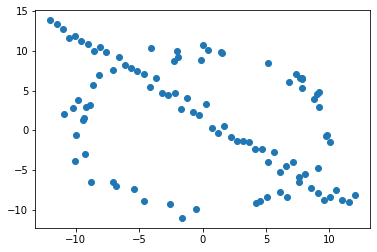

In [3]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
np.random.seed(45)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
t_ = 1.96*1
x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n ,1)))
X = np.vstack((X_circ, X_line))

plt.scatter(X[..., 0], X[..., 1] )
plt.show()

12.052880456056386


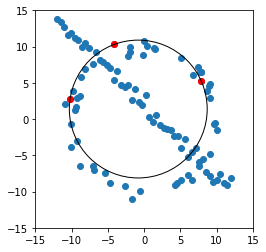

In [4]:
def define_circle(p1, p2, p3):
    
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    x = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    y = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det
    return ((x, y), np.sqrt((x - p1[0])**2 + (y - p1[1])**2))

p = 0.8
e = 0.5
s = 3
N = np.log10(1-p)/np.log10(1-(1-e)**s)
print(N)
max_k = 0

for i in range(int(N)):
    ind1 = np.random.randint(0, 2*half_n)
    ind2 = np.random.randint(0, 2*half_n)
    ind3 = np.random.randint(0, 2*half_n)
    c_1 = [X[..., 0][ind1], X[..., 1][ind1]]
    c_2 = [X[..., 0][ind2], X[..., 1][ind2]]
    c_3 = [X[..., 0][ind3], X[..., 1][ind3]]
    
    cen, rad = define_circle(c_1, c_2, c_3)
    k = 0

    for i in range(half_n):
        a, b = X[..., 0][i], X[..., 1][i]
        if cen is None: continue
        dis2 = np.sqrt((a-cen[0])**2 + (b - cen[1])**2)
        r = rad
        
        if r-t_ < dis2 < r + t_:
            k+=1
    
    if max_k < k:
        max_k = k
        f_c1, f_c2, f_c3 = c_1, c_2, c_3
        f_cen, f_rad = cen, rad
    

circle=plt.Circle(f_cen,f_rad, fill = False)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_aspect('equal')
plt.scatter(X[..., 0], X[..., 1] )
plt.scatter(np.array((f_c1, f_c2, f_c3))[..., 0], np.array((f_c1, f_c2, f_c3))[..., 1], color = 'r')
plt.show()

[[147, 206]]
[[147, 206], [521, 289]]
[[147, 206], [521, 289], [521, 518]]
[[147, 206], [521, 289], [521, 518], [134, 523]]
[[ 2.92769124e-01 -1.82305125e-02  1.47000000e+02]
 [ 9.89004098e-02  3.11907838e-01  2.06000000e+02]
 [ 1.95686751e-04 -3.49913867e-05  1.00000000e+00]]


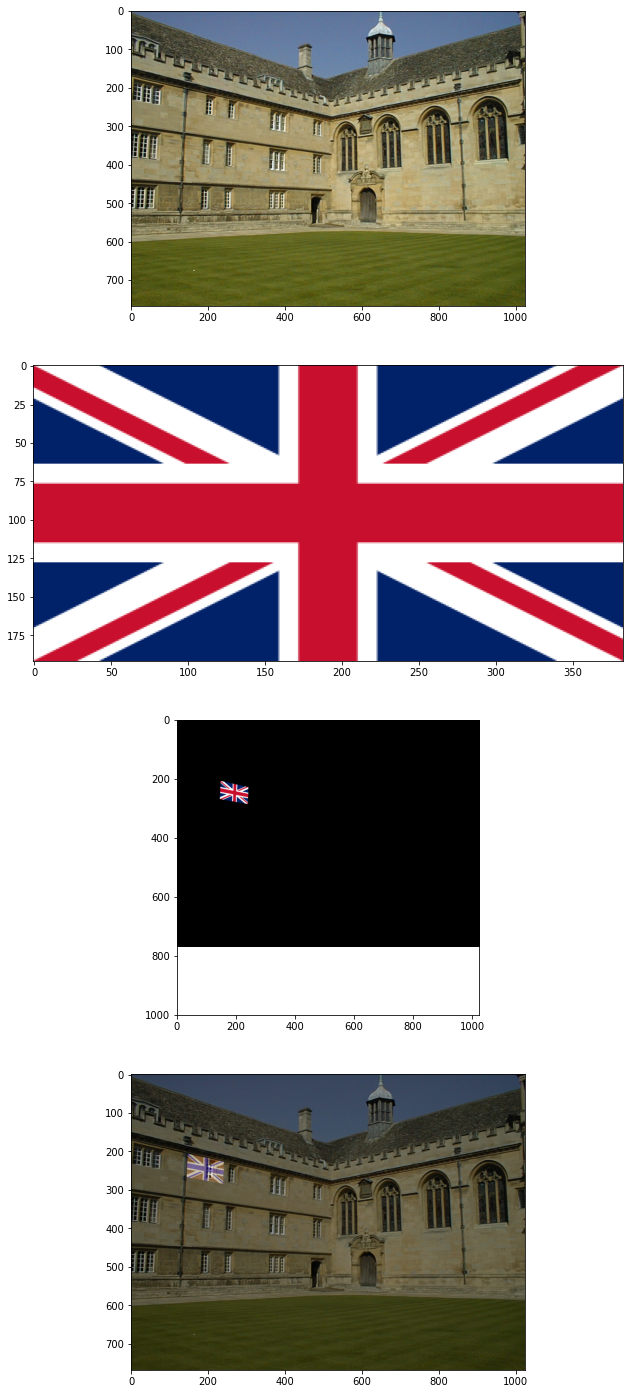

In [15]:
import cv2 as cv

dst_cordinate = [] 
def click_event(event, x, y, flags, params):
    
    if event == cv.EVENT_LBUTTONDOWN:
        dst_cordinate.append([x,y])
        print(dst_cordinate)
        if len(dst_cordinate) == 4: cv.destroyAllWindows()
 
img = cv.imread('images/001.jpg', 1)
assert img is not None
 

cv.imshow('image', img)
cv.setMouseCallback('image', click_event)
cv.waitKey(0)
cv.destroyAllWindows()

src_cordinate = [[0, 0], [1960, 0], [1960, 960], [0, 960]]
H, status = cv.findHomography(np.array(src_cordinate), np.array(dst_cordinate))
print(H)
im4 = cv.imread('Flag_of_the_United_Kingdom.svg.png')
assert im4 is not None

im1to4 = cv.warpPerspective(im4, H, (np.shape(img)[1], np.shape(img)[0]))

im1= cv.cvtColor(img, cv.COLOR_BGR2RGB)
im4= cv.cvtColor(im4, cv.COLOR_BGR2RGB)
im1to4= cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)

dst = cv.addWeighted(img, 0.6, im1to4, 0.4, 0.0)
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(4, 1, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im4)
ax[2].imshow(im1to4)
ax[2].set_ylim([1000, 0])
ax[2].set_aspect('equal')
ax[3].imshow(dst)
plt.show()


cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

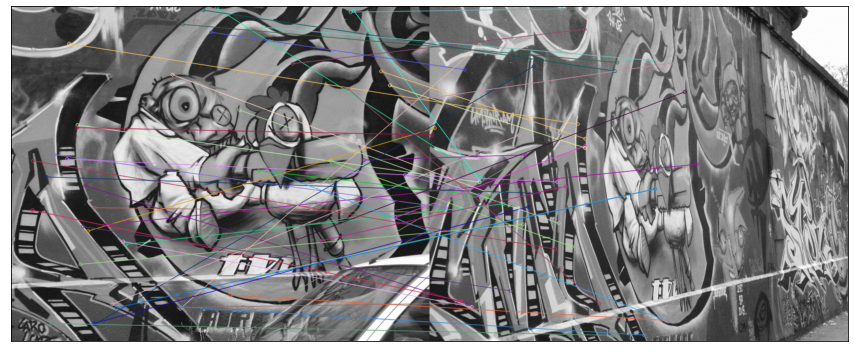

In [5]:
import cv2 as cv 
import matplotlib.pyplot as plt
im1 = cv.imread('img1.ppm')  
im2 = cv.imread('img5.ppm') 

assert im1 is not None
assert im2 is not None

im1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

s = cv.SIFT_create()

key1, descr1 = s.detectAndCompute(im1,None)
key2, descr2 = s.detectAndCompute(im2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descr1,descr2)
matches = sorted(matches, key = lambda x:x.distance)

im3 = cv.drawMatches(im1, key1, im2, key2, matches[:50], im2, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(im3)
plt.xticks([]), plt.yticks([])
plt.show()